# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

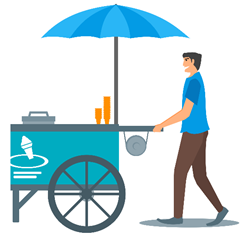

# STEP #1: LIBRARIES IMPORT


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #2: IMPORT DATASET

In [5]:
IceCream = pd.read_csv("IceCreamData.csv")

In [6]:
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685945,343.362905


In [12]:
IceCream.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [13]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [14]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [15]:
IceCream.columns

Index(['Temperature', 'Revenue'], dtype='object')

In [17]:
null_columns=IceCream.columns[IceCream.isnull().any()]
null_columns

Index([], dtype='object')

In [18]:
IceCream[null_columns].isnull().sum()

Series([], dtype: float64)

In [19]:
print(IceCream[IceCream.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [20]:
IceCream.fillna

<bound method DataFrame.fillna of      Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]>

# STEP#3: VISUALIZE DATASET

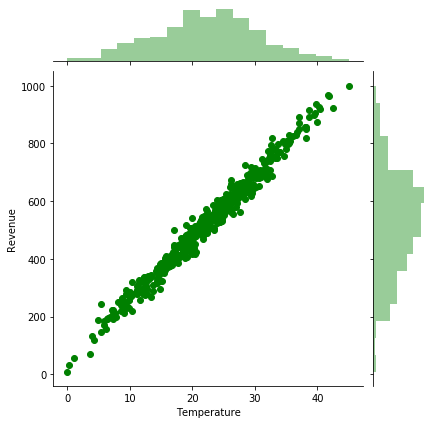

In [25]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream, color = 'green')

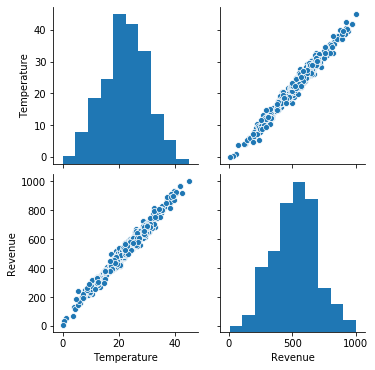

In [26]:
sns.pairplot(IceCream)

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

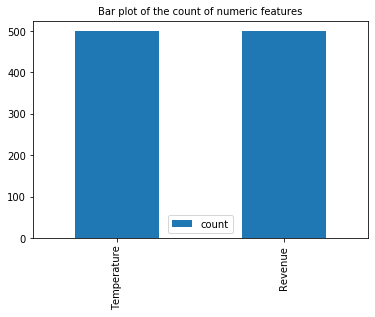

In [31]:
d=IceCream.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=10)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [32]:
y = IceCream['Revenue']

In [33]:
X = IceCream[['Temperature']]

In [34]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [37]:
y

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEP#5: TRAIN THE MODEL

In [40]:
X_train.shape

(375, 1)

In [42]:
y_train.shape

(375,)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
regressor = LinearRegression(fit_intercept = True)

In [45]:
regressor.fit(X_train,y_train)

LinearRegression()

In [46]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.41867914]
Linear Model Coefficient (b):  44.85053962016701


# STEP#6: TEST THE MODEL 

In [47]:
y_predict = regressor.predict( X_test)
y_predict

array([838.57415118, 158.5303365 , 329.75744759, 767.6069185 ,
       453.23173727, 413.23961256, 268.61418146, 314.47223426,
       589.35973965, 449.24282656, 650.39439637, 538.68418019,
       587.45893726, 546.28026677, 459.58371066, 529.65666701,
       350.35673909, 796.53470489, 681.07490497, 644.55690201,
       461.08546357, 441.27517217, 638.73480682, 416.69448749,
       787.60849028, 507.5345267 , 371.08251368, 898.58616171,
       565.50212623, 433.796977  , 639.87214532, 762.68771424,
       314.11575933, 701.68851015, 336.66952458, 576.43545892,
       465.1419742 , 522.15617264, 634.22074416, 656.31072197,
       258.05971843, 338.45307855, 518.60399972, 360.55224583,
       402.62498211, 506.21872048, 387.99867139, 449.38859481,
       562.83853206, 520.12066068, 366.75426212, 537.55488526,
       123.34292143, 246.26064357, 159.19228776, 555.14890733,
       629.17489231, 445.56138549, 457.54105321, 440.73500593,
       197.08360899, 210.7443344 ,  50.5699202 , 607.10

In [48]:
y_test

35     870.765916
405    242.509855
165    335.815687
278    797.566536
341    406.516091
          ...    
209    272.857021
295    412.065001
294    321.750034
159    675.828916
162    583.084449
Name: Revenue, Length: 125, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

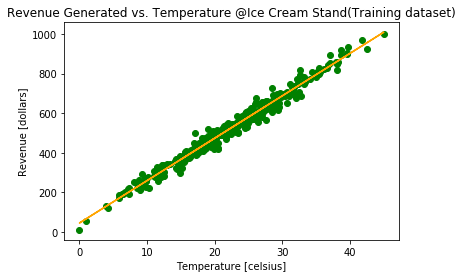

In [51]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'orange')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [celsius]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Time @Ice Cream Stand(Test dataset)')

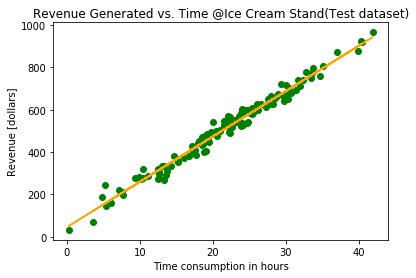

In [53]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, regressor.predict(X_test), color = 'orange')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Time consumption in hours')
plt.title('Revenue Generated vs. Time @Ice Cream Stand(Test dataset)')

In [54]:
y_predict = regressor.predict(np.array(25).reshape(-1, 1))
y_predict

array([580.31751805])

# EXCELLENT JOB! NOW YOU BECAME EXPERT IN SIMPLE LINEAR REGRESSION